<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/Train_hinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
#load folder datasets
folder = '/content/drive/MyDrive/Train/Anh_nguoi/'
#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('An '):
    output = 1.0
  if file.startswith('Kiet '):
    output = 2.0
  if file.startswith('Long '):
    output = 3.0
  if file.startswith('Minh '):
    output = 4.0

  img =load_img(folder+file,target_size=(40,50))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
# lưu dữ liệu vừa xử lý
save('selfie_photos_train.npy',photos)
save('selfie_labels_train.npy',labels)

(240, 40, 50, 3) (240,)


In [ ]:
# kết nối với driver để load dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tạo dữ liệu train
import numpy as np
x_train = np.load('/content/selfie_photos_train.npy')
y_train = np.load('/content/selfie_labels_train.npy')
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
# tiến hành tích chập
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(40,50,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#256 lan tich chap
model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
# train mô hình
from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=32,epochs = 50,verbose = 1)

#lưu mô hình vừa train
model.save('selfie_train.h5')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 40, 50, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 20, 25, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 10, 13, 64)       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load mô hình 
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Train/selfie_train.h5')

1/1 [==============================] - 0s 28ms/step
[1]


'An'

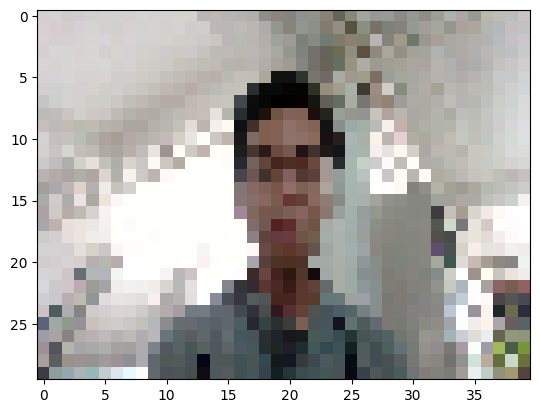

In [ ]:
#load ảnh và cho AI tiến hành nhận diện
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
classes = {1: 'An',2:'Kiet', 3:'Long', 4:'Minh' }
img = load_img("/content/drive/MyDrive/Train/An.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
print(result)
classes[result[0]]


1/1 [==============================] - 0s 21ms/step
predict:  An [4.1417891e-07 5.8995569e-01 1.9302312e-01 1.0457672e-05 4.5240457e-05
 2.9446306e-03 2.5710420e-04 4.4578627e-02 1.6918422e-01 4.8218646e-07]


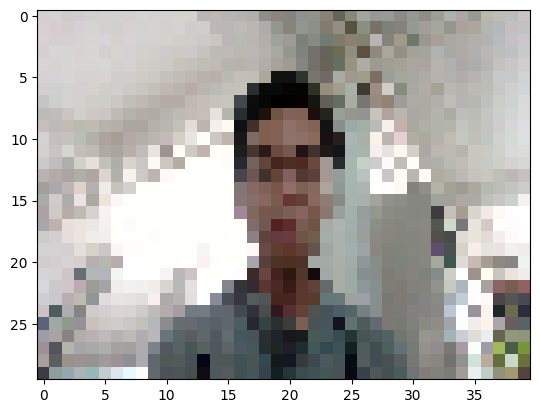

In [ ]:
#load ảnh và cho AI tiến hành nhận diện
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
classes = {1: 'An',2:'Kiet', 3:'Long', 4:'Minh' }
img = load_img("/content/drive/MyDrive/Train/An.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
res = model.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))

In [ ]:
# Hàm lấy hình từ camera và cập nhật lên giao diện
def update_image():
    # Đường dẫn camera, 0 là camera mặc định
    cap = cv2.VideoCapture(0)

    # Lấy kích thước khung hình
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    while camera_active:
        # Đọc khung hình từ camera
        ret, frame = cap.read()

        if ret:
            # Chuyển đổi khung hình từ BGR sang RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Chuyển đổi khung hình thành đối tượng Image
            image = Image.fromarray(rgb_frame)

            # Thay đổi kích thước ảnh nếu cần
            image = image.resize((400, 400))

            # Chuyển đổi ảnh thành đối tượng PhotoImage
            photo = ImageTk.PhotoImage(image)

            # Cập nhật ảnh trên giao diện
            window.image_label.config(image=photo)
            window.image_label.image = photo

    # Giải phóng camera
    cap.release()

In [ ]:
# Nhận dạng ảnh
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (30, 40))
        from keras.utils.image_utils import img_to_array
        image = img_to_array(image)
        Ai = {1: 'An', 2: 'Kiet', 3: 'Long', 4: 'Minh'}
        image = image.reshape((1, 30, 40, 3))
        image = image.astype('float32')
        image = image / 255.0
        result = np.argmax(model.predict(image), axis=1)
        print(result)
        try:
            predicted_label = Ai[result[0]]
            print(predicted_label)
            if predicted_label == 'An':
                result_label_text = "Kết quả: Đăng nhập thành công!"
                create_welcome_window(username)  # Tạo cửa sổ chào mừng với tên người đăng nhập
            else:
                result_label_text = "Kết quả: Đăng nhập không thành công!"
        except KeyError:
            result_label_text = "Kết quả: Đăng nhập không thành công!"

        window.result_label.config(text=result_label_text)